In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import colors
import numpy as np
import datetime as dt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os, ssl
from datetime import date
import glob

In [2]:
path=r'revamped_election_maps/'
all_files = glob.glob(path+"*_revamped.csv")

full_revamped=[]
n=1
for file in all_files:
    print("Reading Columns for file "+str(n))
    #usecols=['id_number','dob','first_name','last_name','middle_name','registration_date','voter_status','gender','party_code','county_1','municipality',
    #         "muni_elect_2021_party",'muni_elect_2021_vote_method',"gen_elect_2020_party",'gen_elect_2020_vote_method',
    #        'gen_prim_2020_vote_method','muni_prim_2021_vote_method','gen_prim_2022_party','gen_prim_2022_vote_method','us_congress']
    usecols=['id_number','dob','registration_date','voter_status','gender','party_code','county_1','state_house','state_senate','us_congress']
    df = pd.read_csv(file, usecols=usecols,low_memory=False,dtype=str)
    #usecols=['id_number','first_name','last_name','middle_name','last_vote_date','dob','party_code','registration_date','voter_status','municipality','county_1',]
    #df = df[['id_number','dob','registration_date','voter_status','party_code','county_1','municipality','gen_prim_2020_vote_method',"gen_prim_2020_party",'gen_elect_2020_vote_method',"gen_elect_2020_party",
    #         'muni_prima_2021_vote_method',"muni_prim_2021_party",'muni_elect_2020_vote_method',"muni_elect_2020_party"]]
    print("Appending full_revamped")
    full_revamped.append(df)
    print('finished appending '+str(n))
    n=n+1

df2=pd.concat(full_revamped,sort=False)


Reading Columns for file 1
Appending full_revamped
finished appending 1
Reading Columns for file 2
Appending full_revamped
finished appending 2
Reading Columns for file 3
Appending full_revamped
finished appending 3
Reading Columns for file 4
Appending full_revamped
finished appending 4
Reading Columns for file 5
Appending full_revamped
finished appending 5
Reading Columns for file 6
Appending full_revamped
finished appending 6
Reading Columns for file 7
Appending full_revamped
finished appending 7
Reading Columns for file 8
Appending full_revamped
finished appending 8
Reading Columns for file 9
Appending full_revamped
finished appending 9
Reading Columns for file 10
Appending full_revamped
finished appending 10
Reading Columns for file 11
Appending full_revamped
finished appending 11
Reading Columns for file 12
Appending full_revamped
finished appending 12
Reading Columns for file 13
Appending full_revamped
finished appending 13
Reading Columns for file 14
Appending full_revamped
fini

In [39]:
b1=gpd.read_file("C://Users/c_ull/data-projects/Map_files/2022_LRC_Senate_Final/2022 LRC-Senate-Final.shp")
new_senate=b1[['DISTRICT','geometry']]
new_senate['DISTRICT']="STS"+("00"+new_senate.DISTRICT.astype(str)).str[-2:]

b1=gpd.read_file("C://Users/c_ull/data-projects/Map_files/2022_LRC_House_Final/2022 LRC-House-Final.shp")
new_house=b1[['DISTRICT','geometry']]
new_house['DISTRICT']="STH"+("00"+new_house.DISTRICT.astype(str)).str[-3:]

b1=gpd.read_file("C://Users/c_ull/data-projects/Map_files/223012-carterplanshapefiles_new_congress/carter_boundaries.shp")
new_congress=b1[['DISTRICT','geometry']]
new_congress['DISTRICT']="USC"+("00"+new_congress.DISTRICT.astype(str)).str[-2:]

c:\users\c_ull\appdata\local\programs\python\python38\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [42]:
countymap=gpd.read_file("https://www.pasda.psu.edu/download/padot/boundary_layers/PaCounty2022_07.zip")
countymap=countymap[['COUNTY_NAM','geometry']]

In [50]:
df2['registration_date']=pd.to_datetime(df2.registration_date,errors='coerce')

In [51]:
dobbs=pd.to_datetime("2022-06-24")

In [53]:
afterdobbs=df2[df2.registration_date.dt.date>=dobbs]

c:\users\c_ull\appdata\local\programs\python\python38\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [70]:
newV=afterdobbs.groupby('county_1').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newV'})
newDV=afterdobbs[afterdobbs.party_code=="D"].groupby('county_1').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newDV'})
newRV=afterdobbs[afterdobbs.party_code=="R"].groupby('county_1').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newRV'})
county1=pd.merge(newV,newDV)
county1=pd.merge(county1,newRV)
county1['DvR']=county1.newDV-county1.newRV

In [71]:
county1['county_1']=county1.county_1.str.upper()

In [72]:
newV=afterdobbs.groupby('state_house').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newV'})
newDV=afterdobbs[afterdobbs.party_code=="D"].groupby('state_house').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newDV'})
newRV=afterdobbs[afterdobbs.party_code=="R"].groupby('state_house').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newRV'})
statehouse1=pd.merge(newV,newDV)
statehouse1=pd.merge(statehouse1,newRV)
statehouse1['DvR']=statehouse1.newDV-statehouse1.newRV

In [73]:
newV=afterdobbs.groupby('state_senate').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newV'})
newDV=afterdobbs[afterdobbs.party_code=="D"].groupby('state_senate').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newDV'})
newRV=afterdobbs[afterdobbs.party_code=="R"].groupby('state_senate').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newRV'})
statesenate1=pd.merge(newV,newDV)
statesenate1=pd.merge(statesenate1,newRV)
statesenate1['DvR']=statesenate1.newDV-statesenate1.newRV

In [129]:
newV=afterdobbs.groupby('us_congress').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newV'})
newDV=afterdobbs[afterdobbs.party_code=="D"].groupby('us_congress').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newDV'})
newRV=afterdobbs[afterdobbs.party_code=="R"].groupby('us_congress').id_number.count().to_frame().reset_index().rename(columns={'id_number':'newRV'})
usc1=pd.merge(newV,newDV)
usc1=pd.merge(usc1,newRV)
usc1['DvR']=usc1.newDV-usc1.newRV
new_congress.rename(columns={'DISTRICT':'us_congress'},inplace=True)

c:\users\c_ull\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [121]:
new_senate.rename(columns={'DISTRICT':'state_senate'},inplace=True)
new_house.rename(columns={'DISTRICT':'state_house'},inplace=True)

In [80]:
countymap.rename(columns={'COUNTY_NAM':'county_1'},inplace=True)

c:\users\c_ull\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [82]:
countymap=pd.merge(countymap,county1)

In [122]:
senatemap=pd.merge(new_senate,statesenate1)
housemap=pd.merge(new_house,statehouse1)

In [130]:
uscmap=pd.merge(new_congress,usc1)

<AxesSubplot:title={'center':'Difference in new voters (Dem v Rep) since Dobbs'}>

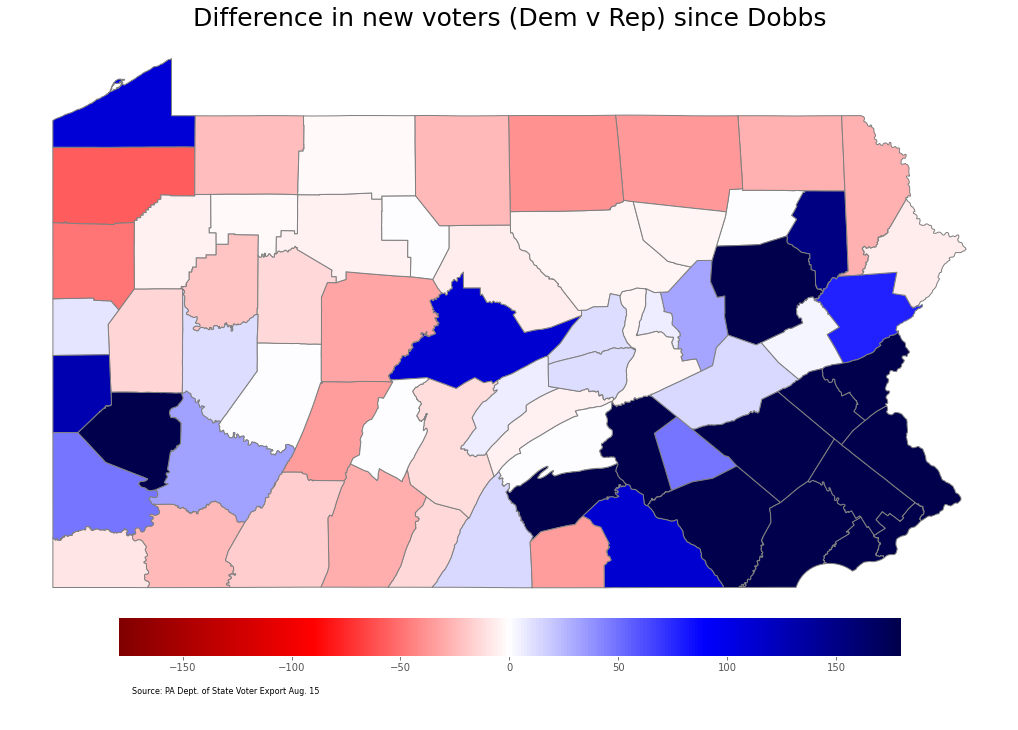

In [115]:
variable='DvR'
x1=-abs(countymap.DvR.mean())
x2=abs(countymap.DvR.mean())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("Difference in new voters (Dem v Rep) since Dobbs",fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State Voter Export Aug. 15",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.004,aspect=20,)
countymap.plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

<AxesSubplot:title={'center':'Difference in new voters (Dem v Rep) since Dobbs'}>

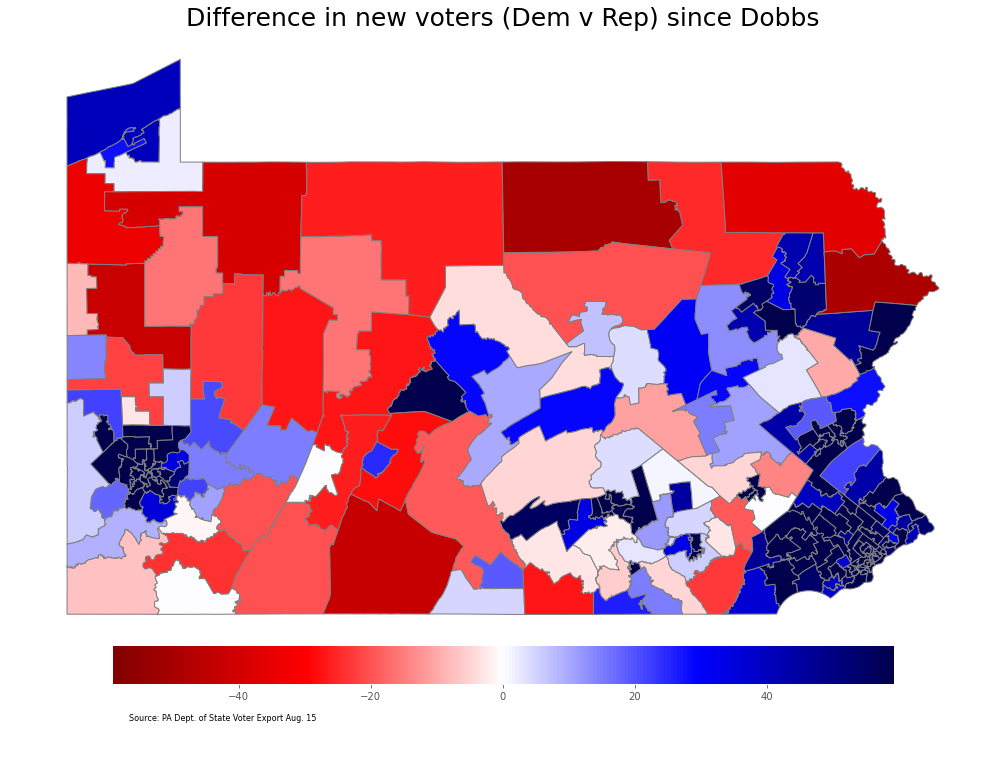

In [123]:
variable='DvR'
x1=-abs(housemap.DvR.mean())
x2=abs(housemap.DvR.mean())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("Difference in new voters (Dem v Rep) since Dobbs",fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State Voter Export Aug. 15",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.004,aspect=20,)
housemap.plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

<AxesSubplot:title={'center':'Difference in new voters (Dem v Rep) since Dobbs'}>

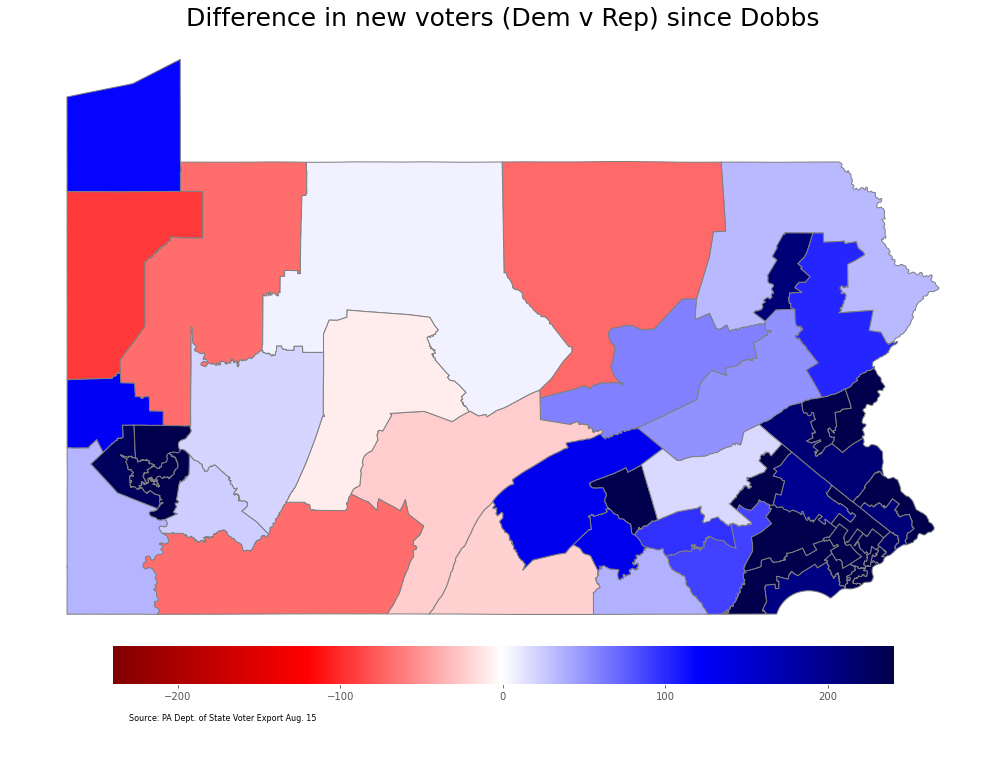

In [124]:
variable='DvR'
x1=-abs(senatemap.DvR.mean())
x2=abs(senatemap.DvR.mean())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("Difference in new voters (Dem v Rep) since Dobbs",fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State Voter Export Aug. 15",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.004,aspect=20,)
senatemap.plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

<AxesSubplot:title={'center':'Difference in new voters (Dem v Rep) since Dobbs'}>

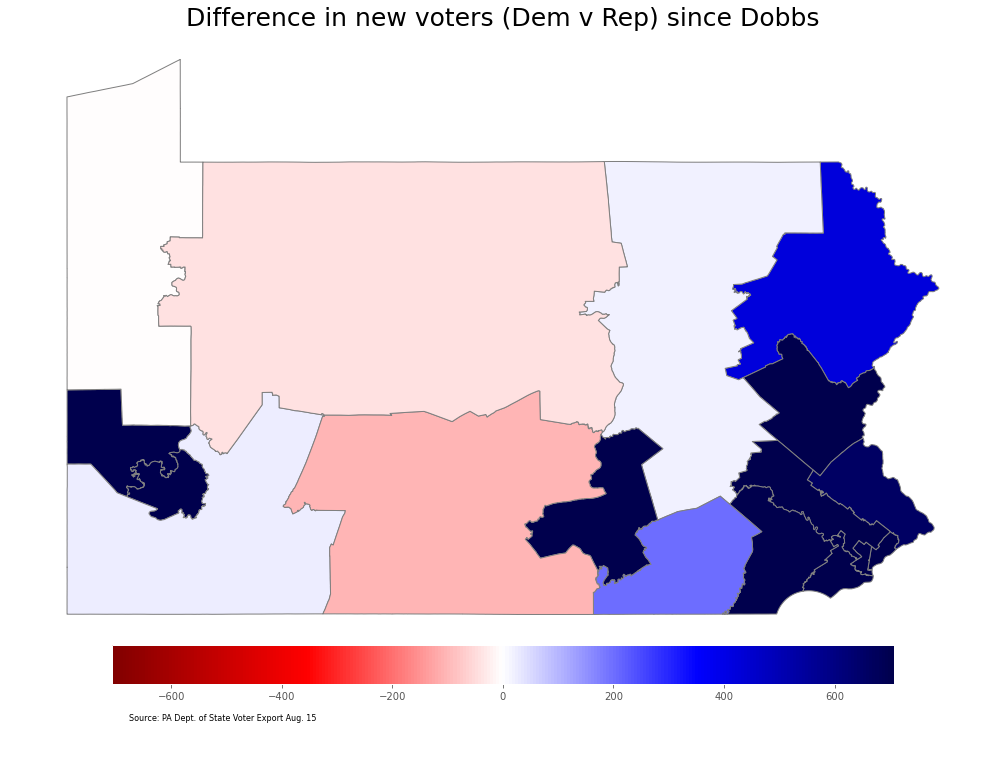

In [135]:
variable='DvR'
x1=-abs(uscmap.DvR.mean())
x2=abs(uscmap.DvR.mean())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("Difference in new voters (Dem v Rep) since Dobbs",fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State Voter Export Aug. 15",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.004,aspect=20,)
uscmap.plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

In [134]:
uscmap.sort_values(by=)

,us_congress,geometry,newV,newDV,newRV,DvR
0,USC02,"POLYGON ((-74.97398 40.04859, -74.97743 40.045...",3149,1864,361,1503
1,USC08,"POLYGON ((-75.33468 41.97021, -75.33425 41.970...",2574,1117,693,424
2,USC07,"POLYGON ((-75.58984 40.48466, -75.59184 40.485...",3721,1709,839,870
3,USC03,"POLYGON ((-75.22066 40.00394, -75.21923 40.004...",4318,2947,235,2712
4,USC01,"POLYGON ((-75.19680 40.60858, -75.19671 40.608...",2586,1254,593,661
5,USC04,"POLYGON ((-75.20629 40.01192, -75.20614 40.011...",2358,1284,458,826
6,USC05,"POLYGON ((-75.21146 39.86700, -75.22137 39.861...",2363,1358,395,963
7,USC06,"POLYGON ((-75.62796 40.23292, -75.62779 40.232...",2832,1424,586,838
8,USC09,"POLYGON ((-75.97696 41.31566, -75.97675 41.315...",1916,715,697,18
9,USC11,"POLYGON ((-76.04949 40.25063, -76.04928 40.250...",2538,1012,808,204
